# Benchmark about the Sliding Window Maximum Problem

## Problem

Given an array A and an integer K. Find the maximum for each and every contiguous subarray of size K.

## Introduction

### Simple solution (trivial?)

The solution to the problem was presented at the lecture of 16/09/2020, and the solution presented are three, described below.

The simple (trivial) solution presented at the lesson use two **for**, and a C++ implementation is reported below

```cpp
std::vector<int> max_sub_array_naive_sol(const std::vector<int> &input, int size_sub_array)
{
    vector<int> max_values;
    max_values.reserve(input.size() - size_sub_array + 1);
    for (int i = 0; i <= input.size() - size_sub_array; i++) {
        int max_value = input.at(i);
        for (int j = 1; j < size_sub_array; j++) {
            if (max_value < input.at(i + j)) {
                max_value = input.at(i + j);
            }
        }
        max_values.push_back(max_value);
    }

    return max_values;
}
```

The cost of this algorithm is `O(N^2)` of computation


### Balance Binary Tree solution (RbTree)

The second solution of the problem suggest to use the balance tree, and a C++ implementation is reported below:

```cpp
std::vector<int> max_sub_array_bbst_sol(const std::vector<int> &input, int size_sub_array)
{
    std::vector<int> result;
    result.reserve(input.size() - size_sub_array + 1);
    std::multiset<int> balanced_tree;
    for (int i = 0; i < input.size(); i++) {
        //std::cout << "Insert " << input[i] << std::endl;
        balanced_tree.insert(input.at(i));
        if (i >= size_sub_array - 1) {
            if (i - size_sub_array >= 0) {
                //std::cout <<  "Removing " << input[i - size_sub_array] << std::endl;
                balanced_tree.erase(balanced_tree.find(input.at(i - size_sub_array)));
            }
            int max_el = *balanced_tree.rbegin();
            //std::cout <<  "Max " << max_el << std::endl;
            result.push_back(max_el);
        }
    }
    return result;
}
```

The cost of this algorithm in terms of computation is  `O(n log n)`.


### FIFO solution (advanced)

The final solution proposes to use the FIFO queue to reduce the cost of the algorithm to linear time, and a C++ implementation is reported below

```cpp
std::vector<int> max_sub_array_deck_sol(const std::vector<int> &input, int size_sub_array)
{
    std::vector<int> result;
    result.reserve(input.size() - size_sub_array + 1);
    std::deque<int> priority_queue;
    for (int i = 0; i < input.size(); i++) {
        remove_minors_element(input, priority_queue, input.at(i));
        priority_queue.push_back(i);
        remove_element_out_sub_array( priority_queue, i, size_sub_array);
        if (i - (size_sub_array - 1) >= 0) {
            int max = input.at(priority_queue.front());
            result.push_back(max);
        }
    }
    return result;
}
```

Where the `remove_minors_elementv` and `remove_element_out_sub_array` are two util function reported below

```cpp
template<class T>
inline void remove_minors_element(const std::vector<int> &input, std::deque<T> &priority_queue, int new_element)
{
    while (!priority_queue.empty() && input[priority_queue.back()] <= new_element) {
        priority_queue.pop_back();
    }
}

template<class T>
inline void remove_element_out_sub_array(std::deque<T> &priority_queue, int actual_pos, int size_sub_array)
{
    while  (!priority_queue.empty() && actual_pos - size_sub_array >= priority_queue.front()) {
        priority_queue.pop_front();
    }
}
```

At this point, an interesting test is determinant if the C++ STL makes the code a little more slowly and I try to reproduce the second solution with a pure C++ implementation of RB Tree. I used the implementation called Red-Black-Tree and it is available on Github at the following link https://github.com/anandarao/Red-Black-Tree.

I choose this implementation because has 38 stars on github and I assume that is tested from the community.

The implementation for the code is equal to the solution reported from the Solution with Balance Binary Tree.

So, at this point, I start to use [google benchmark](https://github.com/google/benchmark) to test the different implementation with the two solutions of a balanced tree.

In [87]:
import pandas
import json
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')


result_file = open('result.json', 'r')
result_tree_imp = open('bt_result.json', 'r')

result_json = json.loads(result_file.read())
result_tree_json = json.loads(result_tree_imp.read())
bm_list = result_json['benchmarks']
bm_tree_list = result_tree_json['benchmarks']


## Bechmark balanced binary tree

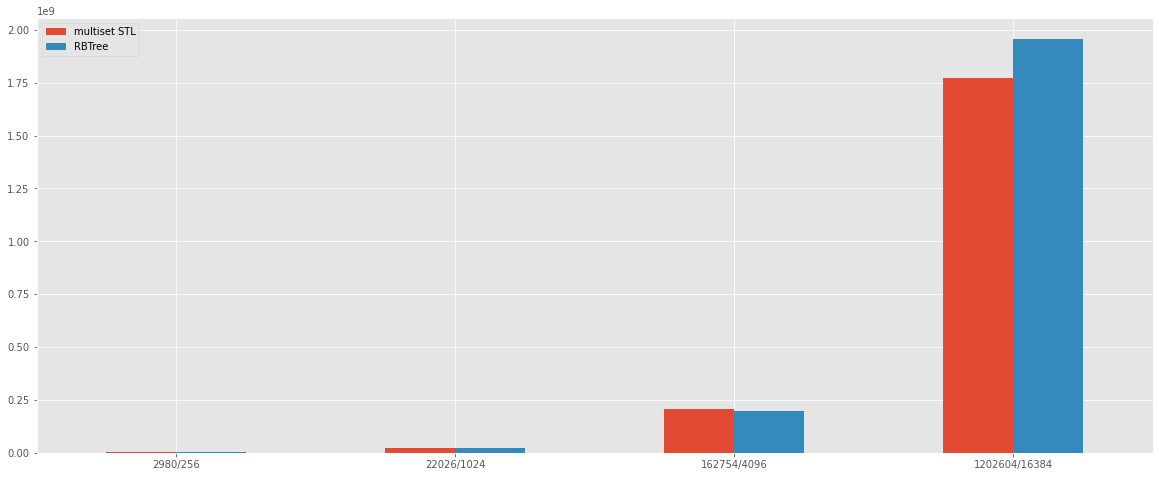

In [88]:
bm_rb_res = []
bm_stl_res = []
bm_input = []
bm_label = []
bm_stl_input = []
bm_stl_label = []
for bm in bm_list:
    if  'RB_Tree' in bm['run_name']:
        bm_rb_res.append(bm['real_time'])
        bm_input.append(bm['run_name'].split('/')[2])
        bm_label.append('{}/{}'.format(bm['run_name'].split('/')[2], bm['run_name'].split('/')[1]))
    elif 'Balance_Tree' in bm['run_name']:
        bm_stl_res.append(bm['real_time'])
        bm_stl_input.append(bm['run_name'].split('/')[1])

stl = pandas.DataFrame({
    'multiset STL': bm_stl_res,
    'RBTree': bm_rb_res
    }, index=bm_label)

stl.plot.bar(rot=0, figsize=(20,8))
bm_rb_res = []
bm_stl_res = []
bm_input = []
bm_label = []

The result looks like that the pure implementation is slower then the C++ multiset implementation, this result needs another proof to see if the c++ STL is faster than the pure implementation.

For this reason, I make another test on the simple implementation of the three compared with the set from the C++ STL and I received good feedback reported below:

<AxesSubplot:>

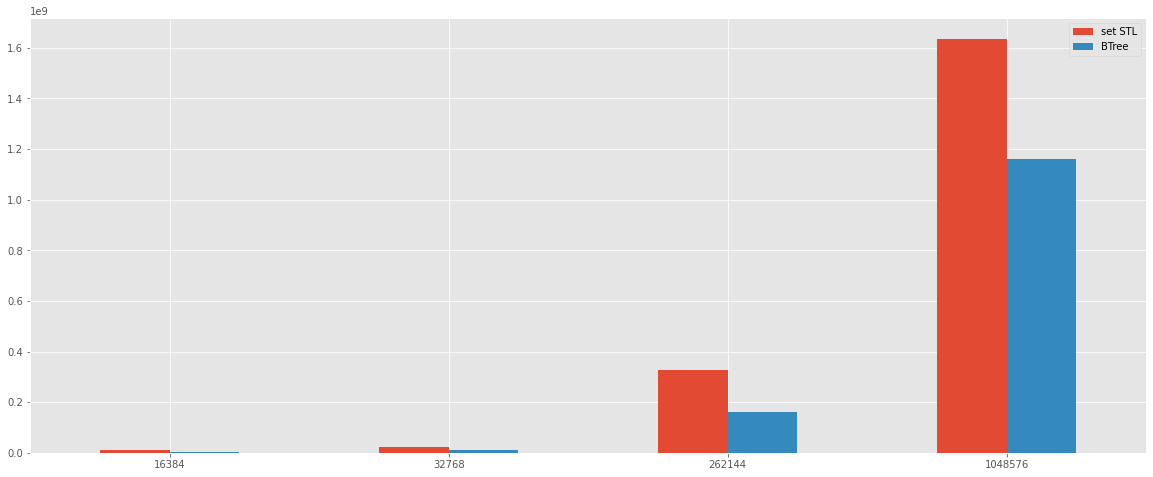

In [89]:
bm_bt_res = []
bm_stl_res = []
bm_input = []
bm_label = []
bm_stl_input = []
for bm in bm_tree_list:
    if  'BM_STL' in bm['run_name']:
        bm_stl_res.append(bm['real_time'])
        bm_input.append(bm['run_name'].split('/')[1])
        bm_label.append(bm['run_name'].split('/')[1])
    else:
        bm_bt_res.append(bm['real_time'])
        bm_input.append(bm['run_name'].split('/')[1])
        
stl = pandas.DataFrame({
    'set STL': bm_stl_res,
    'BTree': bm_bt_res
    }, index=bm_label)

stl.plot.bar(rot=0, figsize=(20,8))

The result shows that the insert on binary three is more quickly than the insert on set from C++ STL. I can assume that the open-source implementation can be optimized for balanced operation.

Foot Note: The implementation of Tree in C++ in not available yet on Github but I will update it when it is ready.

## Comparison between solutions proposed at the lesson.

<AxesSubplot:>

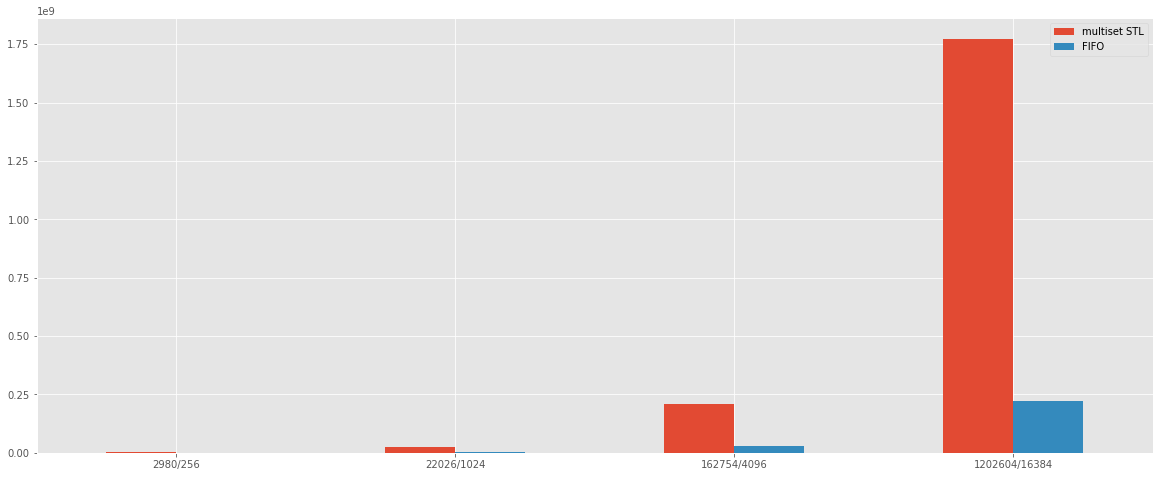

In [92]:
bm_stl_res = []
bm_fifo_res = []
bm_naive_res = []
bm_stl_input = []
bm_fifo_input = []
bm_naive_input = []
bm_label = []
for bm in bm_list:
    if 'Balance_Tree' in bm['run_name']:
        bm_stl_res.append(bm['real_time'])
        bm_stl_input.append(bm['run_name'].split('/')[1])
        bm_label.append('{}/{}'.format(bm['run_name'].split('/')[2], bm['run_name'].split('/')[1]))
    elif 'FIFO' in bm['run_name']:
        bm_fifo_res.append(bm['real_time'])
        bm_fifo_input.append(bm['run_name'].split('/')[1])
    elif 'NAIVE_SOL' in bm['run_name']:
        bm_naive_res.append(bm['real_time'])
        bm_naive_input.append(bm['run_name'].split('/')[1])

summary = pandas.DataFrame({
    'multiset STL': bm_stl_res,
    'FIFO': bm_fifo_res
    }, index=bm_label)

summary.plot.bar(rot=0, figsize=(20,8))


The simple solution can not be inside the chart above because the numbers are very big, I reported below the chart that includes the simple solution.

<AxesSubplot:>

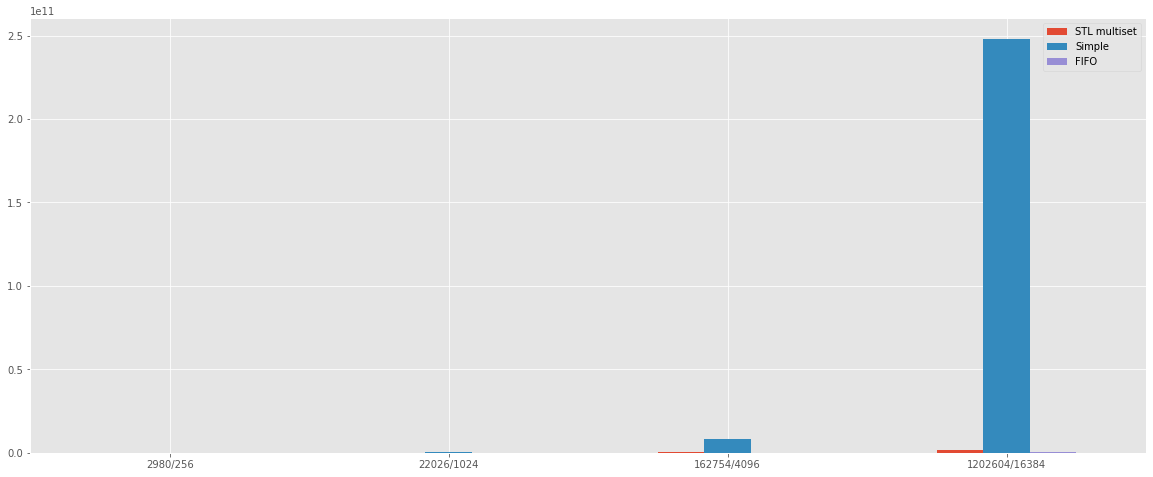

In [93]:
summary = pandas.DataFrame({
    'STL multiset': bm_stl_res,
    'Simple': bm_naive_res,
    'FIFO': bm_fifo_res
    }, index=bm_label)

summary.plot.bar(rot=0, figsize=(20,8))

## Conclusion

The conclusion is that the solutions give a different result for different dimensions of k and N, in addition, the solution with the FIFO is very performed and this benchmark gives us the proof. However, from the benchmark with the Red and black tree give some result that needs more to go in deep to see, if is possible do better than the C++ STL.

In conclusion, the benchmark can be optimized with the code, because each benchmark uses a different input with the same size and same value of k.

To generate the dimension of K and N inside the benchmark has used two different exponential functions such as:

K = 2^i, with i = [8:16]
N = e^i, with i = [8:16] 